# Fama French 3-Factor Modeling of NYSE stocks

In [2]:
import pandas as pd

#### Extracting and Preparing Data

In [4]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [5]:
import yfinance as yf

**Enter dates range:**

In [7]:
# Define the start and end dates (yyyy-mm-dd)
start_date = pd.to_datetime("2022-01-01")
end_date = pd.to_datetime("2024-11-06")

# Calculate the difference in months
months_diff = (end_date.year - start_date.year) * 12 + end_date.month - start_date.month

print(months_diff)

34


**Enter stock tickers:**

In [9]:
# List of tickers for NSE stocks (append '.NS' to each NSE ticker)
tickers = ["JPM", "CVX", "C", "AMD", "TSLA", "AMZN", "UBER", "GOOG", "MSFT", "DIS"]  # Add more tickers as needed

# Download historical data for 1 or 2 years
data = yf.download(tickers, start=start_date, end=end_date)

# Extract only the closing prices
closing_prices = data['Close']

# Display the combined DataFrame
print(closing_prices.head())

# Optionally, save to a CSV file if you want
closing_prices.to_csv("nse_closing_prices.csv")

[*********************100%***********************]  10 of 10 completed


Ticker                            AMD        AMZN          C         CVX  \
Date                                                                       
2022-01-03 00:00:00+00:00  150.240005  170.404495  63.099998  119.260002   
2022-01-04 00:00:00+00:00  144.419998  167.522003  63.590000  121.430000   
2022-01-05 00:00:00+00:00  136.149994  164.356995  62.849998  122.220001   
2022-01-06 00:00:00+00:00  136.229996  163.253998  64.910004  123.260002   
2022-01-07 00:00:00+00:00  132.000000  162.554001  65.779999  125.029999   

Ticker                            DIS        GOOG         JPM        MSFT  \
Date                                                                        
2022-01-03 00:00:00+00:00  156.759995  145.074493  161.699997  334.750000   
2022-01-04 00:00:00+00:00  155.729996  144.416504  167.830002  329.010010   
2022-01-05 00:00:00+00:00  155.190002  137.653503  163.779999  316.380005   
2022-01-06 00:00:00+00:00  156.899994  137.550995  165.520004  313.880005   
2022-

In [10]:
df = pd.read_csv(r"nse_closing_prices.csv")
df.head()

,Date,AMD,AMZN,C,CVX,DIS,GOOG,JPM,MSFT,TSLA,UBER
0,2022-01-03 00:00:00+00:00,150.240005,170.404495,63.099998,119.260002,156.759995,145.074493,161.699997,334.750000,399.926666,43.950001
1,2022-01-04 00:00:00+00:00,144.419998,167.522003,63.590000,121.430000,155.729996,144.416504,167.830002,329.010010,383.196655,44.419998
2,2022-01-05 00:00:00+00:00,136.149994,164.356995,62.849998,122.220001,155.190002,137.653503,163.779999,316.380005,362.706665,43.240002
3,2022-01-06 00:00:00+00:00,136.229996,163.253998,64.910004,123.260002,156.899994,137.550995,165.520004,313.880005,354.899994,42.029999
4,2022-01-07 00:00:00+00:00,132.000000,162.554001,65.779999,125.029999,157.830002,137.004501,167.160004,314.040009,342.320007,41.509998


In [11]:
df.set_index('Date', inplace =True)

In [12]:
df.shape

(715, 10)

#### Calculating daily returns

In [14]:
import numpy as np

In [15]:
returns = df.pct_change()

In [16]:
returns.dropna(inplace = True)

In [17]:
returns.head()

,AMD,AMZN,C,CVX,DIS,GOOG,JPM,MSFT,TSLA,UBER
Date,,,,,,,,,,
2022-01-04 00:00:00+00:00,-0.038738,-0.016916,0.007765,0.018196,-0.006571,-0.004536,0.037910,-0.017147,-0.041833,0.010694
2022-01-05 00:00:00+00:00,-0.057264,-0.018893,-0.011637,0.006506,-0.003467,-0.046830,-0.024132,-0.038388,-0.053471,-0.026565
2022-01-06 00:00:00+00:00,0.000588,-0.006711,0.032777,0.008509,0.011019,-0.000745,0.010624,-0.007902,-0.021523,-0.027983
2022-01-07 00:00:00+00:00,-0.031050,-0.004288,0.013403,0.014360,0.005927,-0.003973,0.009908,0.000510,-0.035447,-0.012372
2022-01-10 00:00:00+00:00,0.000000,-0.006570,0.003801,0.000640,-0.007793,0.011456,0.000957,0.000732,0.030342,0.026259


### Constructing portfolio

__Equal weighted portfolio__

In [20]:
#weights = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
# Count the total number of stocks
num_stocks = len(df.columns)
num_stocks


# Create an array of equal weights
equal_weights = np.repeat(1/num_stocks, num_stocks)
equal_weights

weights = equal_weights
weights

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [21]:
# Create portfolio returns column
returns['Portfolio']= returns.dot(weights)

In [22]:
returns.head()

,AMD,AMZN,C,CVX,DIS,GOOG,JPM,MSFT,TSLA,UBER,Portfolio
Date,,,,,,,,,,,
2022-01-04 00:00:00+00:00,-0.038738,-0.016916,0.007765,0.018196,-0.006571,-0.004536,0.037910,-0.017147,-0.041833,0.010694,-0.005117
2022-01-05 00:00:00+00:00,-0.057264,-0.018893,-0.011637,0.006506,-0.003467,-0.046830,-0.024132,-0.038388,-0.053471,-0.026565,-0.027414
2022-01-06 00:00:00+00:00,0.000588,-0.006711,0.032777,0.008509,0.011019,-0.000745,0.010624,-0.007902,-0.021523,-0.027983,-0.000135
2022-01-07 00:00:00+00:00,-0.031050,-0.004288,0.013403,0.014360,0.005927,-0.003973,0.009908,0.000510,-0.035447,-0.012372,-0.004302
2022-01-10 00:00:00+00:00,0.000000,-0.006570,0.003801,0.000640,-0.007793,0.011456,0.000957,0.000732,0.030342,0.026259,0.005982


In [23]:
returns['Portfolio'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Portfolio,714.0,0.000389,0.016023,-0.055769,-0.008217,0.000641,0.010035,0.075509


In [24]:
# Calculate cumulative returns (growth factor)
daily_cum_ret=(1+returns).cumprod()
daily_cum_ret.tail()

,AMD,AMZN,C,CVX,DIS,GOOG,JPM,MSFT,TSLA,UBER,Portfolio
Date,,,,,,,,,,,
2024-10-30 00:00:00+00:00,0.989084,1.131015,1.022187,1.241405,0.606532,1.214135,1.387817,1.292099,0.643993,1.807281,1.222427
2024-10-31 00:00:00+00:00,0.958932,1.093868,1.016957,1.247862,0.613677,1.190354,1.372418,1.213891,0.624740,1.639363,1.189974
2024-11-01 00:00:00+00:00,0.944223,1.161530,1.009667,1.283498,0.611189,1.190078,1.378726,1.225900,0.622564,1.666667,1.200836
2024-11-04 00:00:00+00:00,0.936568,1.148913,0.988114,1.291045,0.611062,1.176499,1.359184,1.220194,0.607211,1.666667,1.190084
2024-11-05 00:00:00+00:00,0.942891,1.170744,1.009033,1.286349,0.616420,1.181531,1.369759,1.229156,0.628715,1.687144,1.204264


Assuming risk free rate to be 5% for the duration

In [26]:
returns['RF'] = 0.05

In [27]:
# Calculate excess portfolio returns
returns['Portfolio_Excess'] = returns['Portfolio'] - returns['RF']

In [28]:
returns.tail()

,AMD,AMZN,C,CVX,DIS,GOOG,JPM,MSFT,TSLA,UBER,Portfolio,RF,Portfolio_Excess
Date,,,,,,,,,,,,,
2024-10-30 00:00:00+00:00,-0.106165,0.009956,-0.002937,-0.003165,-0.010923,0.029216,0.006774,0.001343,-0.007591,0.002777,-0.008071,0.05,-0.058071
2024-10-31 00:00:00+00:00,-0.030485,-0.032844,-0.005116,0.005201,0.011780,-0.019587,-0.011096,-0.060528,-0.029897,-0.092912,-0.026548,0.05,-0.076548
2024-11-01 00:00:00+00:00,-0.015340,0.061856,-0.007168,0.028558,-0.004054,-0.000232,0.004596,0.009893,-0.003482,0.016655,0.009128,0.05,-0.040872
2024-11-04 00:00:00+00:00,-0.008107,-0.010862,-0.021347,0.005880,-0.000209,-0.011410,-0.014174,-0.004654,-0.024661,0.000000,-0.008954,0.05,-0.058954
2024-11-05 00:00:00+00:00,0.006751,0.019001,0.021171,-0.003637,0.008769,0.004277,0.007781,0.007345,0.035414,0.012287,0.011916,0.05,-0.038084


In [29]:
import matplotlib.pyplot as plt

### Benchmark data

get S&P500 data for benchmark

In [32]:
sp500_ticker = "^GSPC"

In [33]:
sp500_data = yf.download(sp500_ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [34]:
sp500_closing_prices = sp500_data['Close']

In [35]:
# Display the closing prices for S&P500
print(sp500_closing_prices.tail())

Ticker                           ^GSPC
Date                                  
2024-10-30 00:00:00+00:00  5813.669922
2024-10-31 00:00:00+00:00  5705.450195
2024-11-01 00:00:00+00:00  5728.799805
2024-11-04 00:00:00+00:00  5712.689941
2024-11-05 00:00:00+00:00  5782.759766


In [36]:
# Calculate daily returns
sp500_returns = sp500_closing_prices.pct_change().dropna()

In [37]:
# Display Nifty 50 returns
print(sp500_returns.tail())

Ticker                        ^GSPC
Date                               
2024-10-30 00:00:00+00:00 -0.003300
2024-10-31 00:00:00+00:00 -0.018615
2024-11-01 00:00:00+00:00  0.004093
2024-11-04 00:00:00+00:00 -0.002812
2024-11-05 00:00:00+00:00  0.012266


In [38]:
# Calculate cumulative returns (growth factor)
sp500_cum_ret=(1+sp500_returns).cumprod()
sp500_cum_ret.tail()

Ticker,^GSPC
Date,
2024-10-30 00:00:00+00:00,1.212050
2024-10-31 00:00:00+00:00,1.189488
2024-11-01 00:00:00+00:00,1.194356
2024-11-04 00:00:00+00:00,1.190997
2024-11-05 00:00:00+00:00,1.205606


In [39]:
sp500_returns['RF'] = 0.05

In [40]:
sp500_returns['Market_Excess'] = sp500_returns['^GSPC'] - sp500_returns['RF']

In [41]:
sp500_returns.tail()

Ticker,^GSPC,RF,Market_Excess
Date,,,
2024-10-30 00:00:00+00:00,-0.003300,0.05,-0.053300
2024-10-31 00:00:00+00:00,-0.018615,0.05,-0.068615
2024-11-01 00:00:00+00:00,0.004093,0.05,-0.045907
2024-11-04 00:00:00+00:00,-0.002812,0.05,-0.052812
2024-11-05 00:00:00+00:00,0.012266,0.05,-0.037734


### **Combining the required dataframes:**

In [43]:
FamaFrenchData = pd.DataFrame()

In [44]:
returns.shape

(714, 13)

In [45]:
sp500_returns.shape

(714, 3)

In [46]:
Market_Excess = sp500_returns['Market_Excess'].reset_index()

In [47]:
Market_Excess.head()

,Date,Market_Excess
0,2022-01-04 00:00:00+00:00,-0.050630
1,2022-01-05 00:00:00+00:00,-0.069393
2,2022-01-06 00:00:00+00:00,-0.050964
3,2022-01-07 00:00:00+00:00,-0.054050
4,2022-01-10 00:00:00+00:00,-0.051441


In [48]:
Portfolio_Excess = returns["Portfolio_Excess"].reset_index()

In [49]:
Portfolio_Excess.head()

,Date,Portfolio_Excess
0,2022-01-04 00:00:00+00:00,-0.055117
1,2022-01-05 00:00:00+00:00,-0.077414
2,2022-01-06 00:00:00+00:00,-0.050135
3,2022-01-07 00:00:00+00:00,-0.054302
4,2022-01-10 00:00:00+00:00,-0.044018


In [50]:
# Convert 'Date' column in both dataframes to datetime64 (make sure they're both in the same format)
Portfolio_Excess['Date'] = pd.to_datetime(Portfolio_Excess['Date'], errors='coerce')  # Coerce invalid formats to NaT
Market_Excess['Date'] = pd.to_datetime(Market_Excess['Date'], errors='coerce')  # Same here

# Now merge on 'Date' (after converting to datetime)
FamaFrenchData = pd.merge(Portfolio_Excess, Market_Excess, on='Date', how='inner')

In [51]:
nat_count = FamaFrenchData['Date'].isna().sum()

In [52]:
nat_count

0

In [53]:
FamaFrenchData.set_index('Date', inplace = True)

**Fama French Data:**

In [55]:
FamaFrenchData.tail()

,Portfolio_Excess,Market_Excess
Date,,
2024-10-30 00:00:00+00:00,-0.058071,-0.053300
2024-10-31 00:00:00+00:00,-0.076548,-0.068615
2024-11-01 00:00:00+00:00,-0.040872,-0.045907
2024-11-04 00:00:00+00:00,-0.058954,-0.052812
2024-11-05 00:00:00+00:00,-0.038084,-0.037734


### Calculating Beta

**with Covariance and variance of benchmark**

In [58]:
# Calculate the co-variance matrix between Portfolio_Excess and Market_Excess
covariance_matrix = FamaFrenchData[['Portfolio_Excess', 'Market_Excess']].cov()

In [59]:
covariance_matrix

,Portfolio_Excess,Market_Excess
Portfolio_Excess,0.000257,0.000164
Market_Excess,0.000164,0.000124


In [60]:
# Extract the co-variance co-efficient
covariance_coefficient = covariance_matrix.iloc[0, 1]
print(covariance_coefficient)

0.000163598355467535


In [61]:
# Calculate the benchmark variance
benchmark_variance = FamaFrenchData['Market_Excess'].var()
print(benchmark_variance)

0.00012416761304298387


In [62]:
# Calculating the portfolio market beta
portfolio_beta = covariance_coefficient/benchmark_variance
print(portfolio_beta)

1.317560605847365


#### Calculating beta with CAPM

<img src="screenshots/capm.JPG" alt="Image Description" width="50%">

In [65]:
# Import statsmodels.formula.api
import statsmodels.formula.api as smf 

# Define the regression formula
CAPM_model = smf.ols(formula='Portfolio_Excess ~ Market_Excess', data=FamaFrenchData)

# Print adjusted r-squared of the fitted regression
CAPM_fit = CAPM_model.fit()
print(CAPM_fit.rsquared_adj)

# Extract the beta
regression_beta = CAPM_fit.params['Market_Excess']
print(regression_beta)

0.8393141734798074
1.3175606058473628


### Alpha and multi-factor models

##### The Fama French 3-factor model

### Data Preparation

In [69]:
# Require SMB and HML
small = "VB"
big = "^DJI"
value = "IWD"
growth = "IWF"

In [70]:
# Download data
def download_data(symbol, start_date, end_date):
    data2 = yf.download(symbol, start=start_date, end=end_date)
    # Convert index to datetime
    data2.index = pd.to_datetime(data2.index)
    return data2['Adj Close']
    

# Fetch adjusted close prices for each
small_data = download_data(small, start_date, end_date)
big_data = download_data(big, start_date, end_date)
value_data = download_data(value, start_date, end_date)
growth_data = download_data(growth, start_date, end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [71]:
# changing column names for convenience
small_data.columns = ['small']
big_data.columns = ['big']
value_data.columns = ['value']
growth_data.columns = ['growth']

In [72]:
small_data.index.dtype

datetime64[ns, UTC]

In [73]:
big_data.head()

,big
Date,
2022-01-03 00:00:00+00:00,36585.058594
2022-01-04 00:00:00+00:00,36799.648438
2022-01-05 00:00:00+00:00,36407.109375
2022-01-06 00:00:00+00:00,36236.468750
2022-01-07 00:00:00+00:00,36231.660156


In [74]:
# Calculate daily returns
small_returns = small_data.pct_change().dropna()
big_returns = big_data.pct_change().dropna()
value_returns = value_data.pct_change().dropna()
growth_returns = growth_data.pct_change().dropna()

In [75]:
combined_returns = pd.concat([small_returns, big_returns, value_returns, growth_returns], axis = 1) # axis = 1 to join along columns 
combined_returns.head()

,small,big,value,growth
Date,,,,
2022-01-04 00:00:00+00:00,0.002242,0.005866,0.008782,-0.010365
2022-01-05 00:00:00+00:00,-0.028074,-0.010667,-0.008765,-0.031912
2022-01-06 00:00:00+00:00,0.004829,-0.004687,0.001958,-0.002781
2022-01-07 00:00:00+00:00,-0.007681,-0.000133,0.002488,-0.011018
2022-01-10 00:00:00+00:00,-0.003802,-0.004493,-0.001536,-0.000585


In [76]:
combined_returns['SMB'] = combined_returns['small'] - combined_returns['big'] 
combined_returns['HML'] = combined_returns['value'] - combined_returns['growth'] 

In [77]:
combined_returns.head()

,small,big,value,growth,SMB,HML
Date,,,,,,
2022-01-04 00:00:00+00:00,0.002242,0.005866,0.008782,-0.010365,-0.003623,0.019147
2022-01-05 00:00:00+00:00,-0.028074,-0.010667,-0.008765,-0.031912,-0.017407,0.023147
2022-01-06 00:00:00+00:00,0.004829,-0.004687,0.001958,-0.002781,0.009516,0.004739
2022-01-07 00:00:00+00:00,-0.007681,-0.000133,0.002488,-0.011018,-0.007548,0.013506
2022-01-10 00:00:00+00:00,-0.003802,-0.004493,-0.001536,-0.000585,0.000691,-0.000951


In [78]:
ff = combined_returns[['SMB', 'HML']]
ff.to_csv("fama_factors.csv")

In [79]:
ff.head()

,SMB,HML
Date,,
2022-01-04 00:00:00+00:00,-0.003623,0.019147
2022-01-05 00:00:00+00:00,-0.017407,0.023147
2022-01-06 00:00:00+00:00,0.009516,0.004739
2022-01-07 00:00:00+00:00,-0.007548,0.013506
2022-01-10 00:00:00+00:00,0.000691,-0.000951


##### Fama French Data Final:

In [81]:
FamaFrenchData_final = pd.merge(FamaFrenchData, ff, on='Date', how='inner')

In [82]:
FamaFrenchData_final.tail()

,Portfolio_Excess,Market_Excess,SMB,HML
Date,,,,
2024-10-30 00:00:00+00:00,-0.058071,-0.053300,0.002543,0.003310
2024-10-31 00:00:00+00:00,-0.076548,-0.068615,-0.005334,0.021311
2024-11-01 00:00:00+00:00,-0.040872,-0.045907,-0.004367,-0.007248
2024-11-04 00:00:00+00:00,-0.058954,-0.052812,0.008792,0.002226
2024-11-05 00:00:00+00:00,-0.038084,-0.037734,0.006537,-0.003208


### Correlation

In [84]:
FamaFrenchData_final.corr()

,Portfolio_Excess,Market_Excess,SMB,HML
Portfolio_Excess,1.000000,0.916264,0.541544,-0.604431
Market_Excess,0.916264,1.000000,0.474746,-0.555809
SMB,0.541544,0.474746,1.000000,-0.190214
HML,-0.604431,-0.555809,-0.190214,1.000000


### Scatter plots

Text(0.5, 1.0, 'SMB vs Portfolio_Excess')

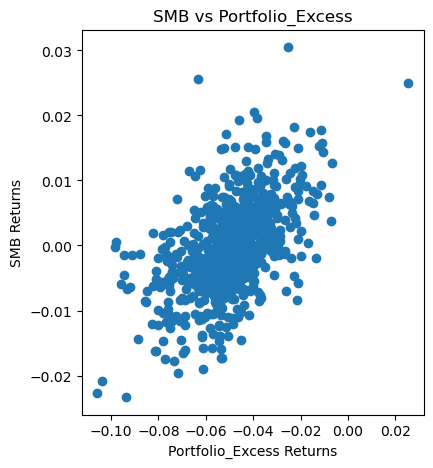

In [86]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))

# Portfolio vs Treasury
plt.subplot(1, 3, 3)
plt.scatter(FamaFrenchData_final['Portfolio_Excess'], FamaFrenchData_final['SMB'])
plt.xlabel("Portfolio_Excess Returns")
plt.ylabel("SMB Returns")
plt.title("SMB vs Portfolio_Excess")

Text(0.5, 1.0, 'HML vs Portfolio_Excess')

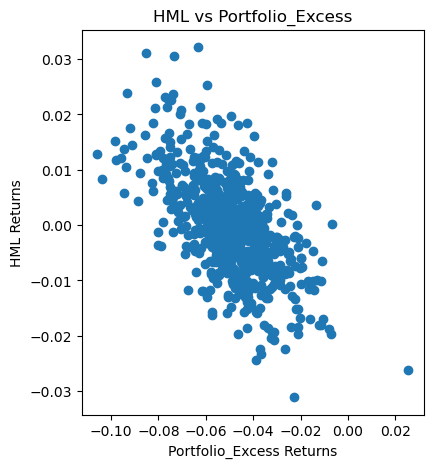

In [87]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))

# Portfolio vs Treasury
plt.subplot(1, 3, 3)
plt.scatter(FamaFrenchData_final['Portfolio_Excess'], FamaFrenchData_final['HML'])
plt.xlabel("Portfolio_Excess Returns")
plt.ylabel("HML Returns")
plt.title("HML vs Portfolio_Excess")

Text(0.5, 1.0, 'Market_Excess vs Portfolio_Excess')

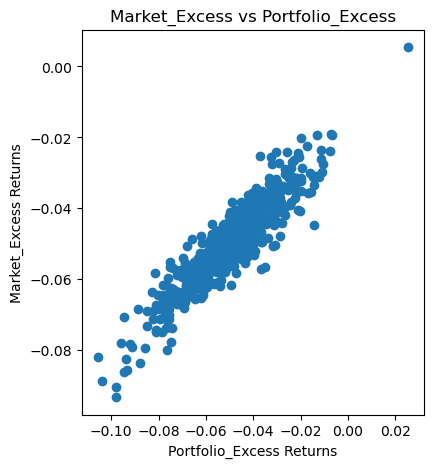

In [88]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))

# Portfolio vs Treasury
plt.subplot(1, 3, 3)
plt.scatter(FamaFrenchData_final['Portfolio_Excess'], FamaFrenchData_final['Market_Excess'])
plt.xlabel("Portfolio_Excess Returns")
plt.ylabel("Market_Excess Returns")
plt.title("Market_Excess vs Portfolio_Excess")

## The Fama French 3-factor model

In [90]:
# Import statsmodels.formula.api
import statsmodels.formula.api as smf 

# Define the regression formula
FamaFrench_model = smf.ols(formula='Portfolio_Excess ~ Market_Excess + SMB + HML', data=FamaFrenchData_final)

# Fit the regression
FamaFrench_fit = FamaFrench_model.fit()

# Extract the adjusted r-squared
regression_adj_rsq = FamaFrench_fit.rsquared_adj
print(regression_adj_rsq)

0.8698555593223748


In [91]:
# Extract the p-value of the SMB factor
smb_pval = FamaFrench_fit.pvalues['SMB']

# If the p-value is significant, print significant
if smb_pval < 0.05:
    significant_msg = 'significant'
else:
    significant_msg = 'not significant'

# Print the SMB coefficient
smb_coeff = FamaFrench_fit.params['SMB']
print("The SMB coefficient is ", smb_coeff, " and is ", significant_msg)

The SMB coefficient is  0.33712076255740914  and is  significant


Historically, since 1982, value stocks have outperformed growth stocks in the majority of cases, and the tide often shifts during times of crisis and during bubbles such as the dot-com bubble during the late 1990's and early 2000's.

In [93]:
# Calculate your portfolio alpha
portfolio_alpha = FamaFrench_fit.params['Intercept']
print(portfolio_alpha)

# Annualize your portfolio alpha
portfolio_alpha_annualized = ((1+portfolio_alpha)**(12/months_diff))-1
print(portfolio_alpha_annualized)

0.004533960244270574
0.001597879772477384


In [94]:
print(FamaFrench_fit.summary())

                            OLS Regression Results                            
Dep. Variable:       Portfolio_Excess   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     1590.
Date:                Sun, 12 Jan 2025   Prob (F-statistic):          1.86e-314
Time:                        12:06:20   Log-Likelihood:                 2668.3
No. Observations:                 714   AIC:                            -5329.
Df Residuals:                     710   BIC:                            -5310.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0045      0.001      3.431

## Ridge and Lasso

In [96]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [97]:
X = FamaFrenchData_final[['Portfolio_Excess']]
#X.head()
y = FamaFrenchData_final.drop(columns = 'Portfolio_Excess')
#y.head()

In [98]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Ridge

In [100]:
# Instantiate Ridge regression model
ridge = Ridge(alpha=1.0)  # Alpha controls regularization strength

In [101]:
# Fit model
ridge.fit(X_train, y_train)

Ridge()

In [102]:
# Predict
y_pred_ridge = ridge.predict(X_test)

In [103]:
# Evaluate
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("Ridge Regression MSE:", mse_ridge)

Ridge Regression MSE: 9.374133917642833e-05


In [104]:
print("Ridge Coefficients:", ridge.coef_)

Ridge Coefficients: [[ 0.07409869]
 [ 0.02804163]
 [-0.03910812]]


### Lasso

In [106]:
# Instantiate Lasso regression model
lasso = Lasso(alpha=0.1)  # Alpha controls regularization strength

# Fit model
lasso.fit(X_train, y_train)

# Predict
y_pred_lasso = lasso.predict(X_test)

# Evaluate
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Lasso Regression MSE:", mse_lasso)

Lasso Regression MSE: 0.00010891667091503215


In [107]:
print("Ridge Coefficients:", lasso.coef_)

Ridge Coefficients: [[ 0.]
 [ 0.]
 [-0.]]


- Lasso's Advantage: If your goal is to identify the most significant factors, Lasso is useful as it eliminates irrelevant ones.
- Ridge's Advantage: If you believe all factors contribute meaningfully and want a robust predictive model, Ridge is often better.

### Ridege GridSearchCV

In [110]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Define parameter grid for Ridge
ridge_param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Initialize Ridge regression model
ridge = Ridge()

# Perform GridSearchCV
ridge_cv = GridSearchCV(ridge, ridge_param_grid, scoring='neg_mean_squared_error', cv=5)
ridge_cv.fit(X_train, y_train)

# Results
print("Best Ridge alpha:", ridge_cv.best_params_)
print("Best Ridge MSE (CV):", -ridge_cv.best_score_)

# Use best estimator
best_ridge = ridge_cv.best_estimator_

# Evaluate on test data
y_pred_ridge = best_ridge.predict(X_test)
print("Ridge Test MSE:", mean_squared_error(y_test, y_pred_ridge))


Best Ridge alpha: {'alpha': 0.01}
Best Ridge MSE (CV): 3.5546861659506565e-05
Ridge Test MSE: 3.8543878534362704e-05


In [111]:
# Extract coefficients from the best Ridge model
ridge_coefficients = best_ridge.coef_
print("Ridge Coefficients:", ridge_coefficients)


Ridge Coefficients: [[ 0.58613038]
 [ 0.22181297]
 [-0.30935032]]


In [112]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Define parameter grid for Lasso
lasso_param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Initialize Lasso regression model
lasso = Lasso(max_iter=10000)  # Increase max_iter to ensure convergence

# Perform GridSearchCV
lasso_cv = GridSearchCV(lasso, lasso_param_grid, scoring='neg_mean_squared_error', cv=5)
lasso_cv.fit(X_train, y_train)

# Results
print("Best Lasso alpha:", lasso_cv.best_params_)
print("Best Lasso MSE (CV):", -lasso_cv.best_score_)

# Use best estimator
best_lasso = lasso_cv.best_estimator_

# Evaluate on test data
y_pred_lasso = best_lasso.predict(X_test)
print("Lasso Test MSE:", mean_squared_error(y_test, y_pred_lasso))


Best Lasso alpha: {'alpha': 0.01}
Best Lasso MSE (CV): 7.913641112737457e-05
Lasso Test MSE: 0.00010891667091503215


In [113]:
# Extract coefficients from the best Lasso model
lasso_coefficients = best_lasso.coef_
print("Lasso Coefficients:", lasso_coefficients)

Lasso Coefficients: [[ 0.]
 [ 0.]
 [-0.]]


### R square
R² indicates **how much of the variance in your dependent variables (the factors) is explained by the independent factors (your model)**. <br/>
MSE, on the other hand, focuses more on prediction accuracy.

In [115]:
# Compute R-squared for the best Ridge model on test data
ridge_r2 = best_ridge.score(X_test, y_test)
print("Ridge R-squared:", ridge_r2)

Ridge R-squared: 0.5542584933973719


In [116]:
# Compute R-squared for the best Lasso model on test data
lasso_r2 = best_lasso.score(X_test, y_test)
print("Lasso R-squared:", lasso_r2)

Lasso R-squared: -0.0050564342140388225
